In [17]:
# check NLDAS conversion (tmin, tmax)
import xarray as xr
import numpy as np

file = '/glade/u/home/hongli/scratch/2020_04_21nldas_gmet/test_uniform_perturb/00818grids/gmet_regr/regress_ts.2016.nc'
f=xr.open_dataset(file)
time = f['time'][:]
pcp = f['pcp'].values[:]
pcp_error = f['pcp_error'].values[:]
ymean = f['ymean'].values[:]
ystd = f['ystd'].values[:]
pcp_update = f['pcp_update'].values[:]
pcp_error_update = f['pcp_error_update'].values[:]

tmean_2 = f['tmean_2'].values[:]
tmean_error_2 = f['tmean_error_2'].values[:]

trange_2 = f['trange_2'].values[:]
trange_error_2 = f['trange_error_2'].values[:]

data_mask = f['data_mask'].values[:]

print('Done')

Done


In [3]:
import numpy as np
pcp_update_cal = np.multiply(pcp,ystd)+ymean
pcp_error_update_cal = np.multiply(pcp_error,ystd)

In [5]:
i,j=150,250
pcp[0,i,j],ystd[0,i,j],ymean[0,i,j],pcp_update[0,i,j],pcp_update_cal[0,i,j]

(-0.03978152945637703,
 0.16817928368813662,
 0.23784142486335727,
 0.23115099573536527,
 0.23115099573536527)

In [18]:
file = '/glade/u/home/hongli/scratch/2020_04_21nldas_gmet/data/stn_regr/conus_regress_eighth_20160101_20161231.nc'
f_stn=xr.open_dataset(file)
time_stn = f_stn['time'][:]
pcp_stn = f_stn['pcp'].values[:]
pcp_error_stn = f_stn['pcp_error'].values[:]

tmean_2_stn = f_stn['tmean_2'].values[:]
tmean_error_2_stn = f_stn['tmean_error_2'].values[:]
trange_2_stn = f_stn['trange_2'].values[:]
trange_error_2_stn = f_stn['trange_error_2'].values[:]


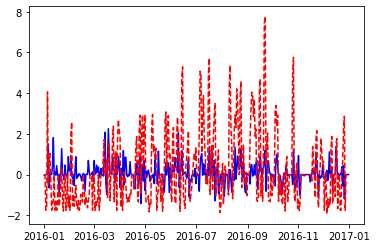

In [16]:
import matplotlib.pyplot as plt
i,j=150,250
plt.plot_date(time, pcp[:,i,j], 'b-', tz=None, label='NLDAS')
plt.plot_date(time, pcp_stn[:,i,j], 'r--', tz=None, label='stn')
plt.show()

In [43]:
import xarray as xr
import numpy as np
from matplotlib.dates import DateFormatter
import datetime,os

formatter = DateFormatter('%Y/%m')
line_marker_size = 0.75
line_width = 0.5
line_alpha = 0.8
scatter_marker_size = 3
scatter_alpha = 0.8
bound_alpha = 0.8
dpi_value = 150

time_format = '%Y-%m-%d'
plot_date_start = '2016-01-01'
plot_date_end = '2016-12-31'
plot_date_start_obj = datetime.datetime.strptime(plot_date_start, time_format)
plot_date_end_obj = datetime.datetime.strptime(plot_date_end, time_format)

# # read nldas regression result
# file = '/glade/u/home/hongli/scratch/2020_04_21nldas_gmet/test_uniform_perturb/00818grids/gmet_regr/regress_ts.2016.nc'
# f=xr.open_dataset(file)
# time = f['time'][:]
# # pcp = f['pcp'].values[:]
# # pcp_error = f['pcp_error'].values[:]
# # ymean = f['ymean'].values[:]
# # ystd = f['ystd'].values[:]
# pcp_update = f['pcp_update'].values[:]
# pcp_error_update = f['pcp_error_update'].values[:]

# tmean_2 = f['tmean_2'].values[:]
# tmean_error_2 = f['tmean_error_2'].values[:]
# trange_2 = f['trange_2'].values[:]
# trange_error_2 = f['trange_error_2'].values[:]

# # read stn regression result
# file = '/glade/u/home/hongli/scratch/2020_04_21nldas_gmet/data/stn_regr/conus_regress_eighth_20160101_20161231.nc'
# f_stn=xr.open_dataset(file)
# time_stn = f_stn['time'][:]
# pcp_stn = f_stn['pcp'].values[:]
# pcp_error_stn = f_stn['pcp_error'].values[:]

# tmean_2_stn = f_stn['tmean_2'].values[:]
# tmean_error_2_stn = f_stn['tmean_error_2'].values[:]
# trange_2_stn = f_stn['trange_2'].values[:]
# trange_error_2_stn = f_stn['trange_error_2'].values[:]

i,j=150,250

# plot pcp and pcp_error
nrow=2 # pcp, pcp_error
ncol=3 # time series, Q-Q plot
fig = plt.figure(figsize=(7*1.2,6.5*0.75))

gs = fig.add_gridspec(nrow, ncol)
ax00 = fig.add_subplot(gs[0, 0:2])
ax01 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1, 0:2])
ax11 = fig.add_subplot(gs[1, 2])

# NLDAS vs. Ensemble [PCP]
ax00.plot_date(time, pcp_stn[:,i,j], 'r-^', tz=None, linewidth=line_width, markersize=line_marker_size, alpha=line_alpha, label='Stn_regr')
ax00.plot_date(time, pcp_update[:,i,j], 'b-o', tz=None, linewidth=line_width, markersize=line_marker_size, alpha=line_alpha, label='NLDAS_regr') 
ax01.scatter(pcp_stn[:,i,j], pcp_update[:,i,j], s=scatter_marker_size, c='k', marker='o', edgecolors='None', alpha=scatter_alpha)

# NLDAS vs. Ensemble [TMEAN]
ax10.plot_date(time, pcp_error_stn[:,i,j], 'r-^', tz=None, linewidth=line_width, markersize=line_marker_size, alpha=line_alpha, label='Stn_regr')
ax10.plot_date(time, pcp_error_update[:,i,j], 'b-o', tz=None, linewidth=line_width, markersize=line_marker_size, alpha=line_alpha, label='NLDAS_regr') 
ax11.scatter(pcp_error_stn[:,i,j], pcp_error_update[:,i,j], s=scatter_marker_size, c='k', marker='o', edgecolors='None', alpha=scatter_alpha)

# 45 degree line in Q-Qplot
axes = [ax01, ax11]
for ax in axes:
    left, right = ax.get_xlim()
    bottom, top = ax.get_ylim()
    ax_min = min([left, bottom])
    ax_max = max([right, top])
    ax.set_xlim([ax_min, ax_max])
    ax.set_ylim([ax_min, ax_max])
    ax.plot([ax_min, ax_max],[ax_min, ax_max],color='grey',linewidth=1.0)

 # title
ax00_title_str = '(a) Precipitation regr' 
ax10_title_str = '(b) Precipitation regr error' 
axes_title_str = [ax00_title_str,ax10_title_str]

axes=[ax00, ax10]
for k in range(len(axes)):
    ax=axes[k]
    title_str=axes_title_str[k]
    ax.set_title(title_str, fontsize='small', fontweight='semibold')

# x-axis label and legend
axes=[ax00, ax10]
for ax in axes:
    ax.set_xlabel('Date', fontsize='xx-small')
    ax.set_xlim(left=plot_date_start_obj, right=plot_date_end_obj)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_tick_params(labelsize='xx-small')#rotation=30,
    ax.legend(loc='upper right', fontsize='xx-small', framealpha=0.5) 

# y-axis label and limit
for ax in [ax00]:
    ax.set_ylabel('Precp (mm/day)^(0.25)', fontsize='xx-small')
for ax in [ax10]:
    ax.set_ylabel('Precp error (mm/day)^(0.25)', fontsize='xx-small')

for ax in [ax01, ax11]:
    ax.set_xlabel('Stn_regr', fontsize='xx-small')
    ax.set_ylabel('NLDAS_regr', fontsize='xx-small')

plt.rc('xtick',labelsize='xx-small')
plt.rc('ytick',labelsize='xx-small') 
fig.tight_layout()

output_dir='/glade/u/home/hongli/scratch/2020_04_21nldas_gmet/scripts/step31_test_regr'
output_filename = 'pcp.png'
fig.savefig(os.path.join(output_dir, output_filename), dpi=150)
plt.close(fig)

print('Done')

Done


In [44]:
i,j=150,250

# plot pcp and pcp_error
nrow=2 # pcp, pcp_error
ncol=3 # time series, Q-Q plot
fig = plt.figure(figsize=(7*1.2,6.5*0.75))

gs = fig.add_gridspec(nrow, ncol)
ax00 = fig.add_subplot(gs[0, 0:2])
ax01 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1, 0:2])
ax11 = fig.add_subplot(gs[1, 2])

# NLDAS vs. Ensemble [PCP]
ax00.plot_date(time, tmean_2_stn[:,i,j], 'r-^', tz=None, linewidth=line_width, markersize=line_marker_size, alpha=line_alpha, label='Stn_regr')
ax00.plot_date(time, tmean_2[:,i,j], 'b-o', tz=None, linewidth=line_width, markersize=line_marker_size, alpha=line_alpha, label='NLDAS_regr') 
ax01.scatter(tmean_2_stn[:,i,j], tmean_2[:,i,j], s=scatter_marker_size, c='k', marker='o', edgecolors='None', alpha=scatter_alpha)

# NLDAS vs. Ensemble [TMEAN]
ax10.plot_date(time, tmean_error_2_stn[:,i,j], 'r-^', tz=None, linewidth=line_width, markersize=line_marker_size, alpha=line_alpha, label='Stn_regr')
ax10.plot_date(time, tmean_error_2[:,i,j], 'b-o', tz=None, linewidth=line_width, markersize=line_marker_size, alpha=line_alpha, label='NLDAS_regr') 
ax11.scatter(tmean_error_2_stn[:,i,j], tmean_error_2[:,i,j], s=scatter_marker_size, c='k', marker='o', edgecolors='None', alpha=scatter_alpha)

# 45 degree line in Q-Qplot
axes = [ax01, ax11]
for ax in axes:
    left, right = ax.get_xlim()
    bottom, top = ax.get_ylim()
    ax_min = min([left, bottom])
    ax_max = max([right, top])
    ax.set_xlim([ax_min, ax_max])
    ax.set_ylim([ax_min, ax_max])
    ax.plot([ax_min, ax_max],[ax_min, ax_max],color='grey',linewidth=1.0)

 # title
ax00_title_str = '(a) Tmean_2 regr' 
ax10_title_str = '(b) Tmean_2 regr error' 
axes_title_str = [ax00_title_str,ax10_title_str]

axes=[ax00, ax10]
for k in range(len(axes)):
    ax=axes[k]
    title_str=axes_title_str[k]
    ax.set_title(title_str, fontsize='small', fontweight='semibold')

# x-axis label and legend
axes=[ax00, ax10]
for ax in axes:
    ax.set_xlabel('Date', fontsize='xx-small')
    ax.set_xlim(left=plot_date_start_obj, right=plot_date_end_obj)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_tick_params(labelsize='xx-small')#rotation=30,
    ax.legend(loc='upper right', fontsize='xx-small', framealpha=0.5) 

# y-axis label and limit
for ax in [ax00]:
    ax.set_ylabel('Temperature ($^\circ$C)', fontsize='xx-small')
for ax in [ax10]:
    ax.set_ylabel('Temperature error ($^\circ$C)', fontsize='xx-small')

for ax in [ax01, ax11]:
    ax.set_xlabel('Stn_regr', fontsize='xx-small')
    ax.set_ylabel('NLDAS_regr', fontsize='xx-small')

plt.rc('xtick',labelsize='xx-small')
plt.rc('ytick',labelsize='xx-small') 
fig.tight_layout()

output_dir='/glade/u/home/hongli/scratch/2020_04_21nldas_gmet/scripts/step31_test_regr'
output_filename = 'tmean.png'
fig.savefig(os.path.join(output_dir, output_filename), dpi=150)
plt.close(fig)

print('Done')

Done


In [45]:
i,j=150,250

# plot pcp and pcp_error
nrow=2 # pcp, pcp_error
ncol=3 # time series, Q-Q plot
fig = plt.figure(figsize=(7*1.2,6.5*0.75))

gs = fig.add_gridspec(nrow, ncol)
ax00 = fig.add_subplot(gs[0, 0:2])
ax01 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1, 0:2])
ax11 = fig.add_subplot(gs[1, 2])

# NLDAS vs. Ensemble [PCP]
ax00.plot_date(time, trange_2_stn[:,i,j], 'r-^', tz=None, linewidth=line_width, markersize=line_marker_size, alpha=line_alpha, label='Stn_regr')
ax00.plot_date(time, trange_2[:,i,j], 'b-o', tz=None, linewidth=line_width, markersize=line_marker_size, alpha=line_alpha, label='NLDAS_regr') 
ax01.scatter(trange_2_stn[:,i,j], trange_2[:,i,j], s=scatter_marker_size, c='k', marker='o', edgecolors='None', alpha=scatter_alpha)

# NLDAS vs. Ensemble [TMEAN]
ax10.plot_date(time, trange_error_2_stn[:,i,j], 'r-^', tz=None, linewidth=line_width, markersize=line_marker_size, alpha=line_alpha, label='Stn_regr')
ax10.plot_date(time, trange_error_2[:,i,j], 'b-o', tz=None, linewidth=line_width, markersize=line_marker_size, alpha=line_alpha, label='NLDAS_regr') 
ax11.scatter(trange_error_2_stn[:,i,j], trange_error_2[:,i,j], s=scatter_marker_size, c='k', marker='o', edgecolors='None', alpha=scatter_alpha)

# 45 degree line in Q-Qplot
axes = [ax01, ax11]
for ax in axes:
    left, right = ax.get_xlim()
    bottom, top = ax.get_ylim()
    ax_min = min([left, bottom])
    ax_max = max([right, top])
    ax.set_xlim([ax_min, ax_max])
    ax.set_ylim([ax_min, ax_max])
    ax.plot([ax_min, ax_max],[ax_min, ax_max],color='grey',linewidth=1.0)

 # title
ax00_title_str = '(a) Trange_2 regr' 
ax10_title_str = '(b) Trange_2 regr error' 
axes_title_str = [ax00_title_str,ax10_title_str]

axes=[ax00, ax10]
for k in range(len(axes)):
    ax=axes[k]
    title_str=axes_title_str[k]
    ax.set_title(title_str, fontsize='small', fontweight='semibold')

# x-axis label and legend
axes=[ax00, ax10]
for ax in axes:
    ax.set_xlabel('Date', fontsize='xx-small')
    ax.set_xlim(left=plot_date_start_obj, right=plot_date_end_obj)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_tick_params(labelsize='xx-small')#rotation=30,
    ax.legend(loc='upper right', fontsize='xx-small', framealpha=0.5) 

# y-axis label and limit
for ax in [ax00]:
    ax.set_ylabel('Temperature ($^\circ$C)', fontsize='xx-small')
for ax in [ax10]:
    ax.set_ylabel('Temperature error ($^\circ$C)', fontsize='xx-small')

for ax in [ax01, ax11]:
    ax.set_xlabel('Stn_regr', fontsize='xx-small')
    ax.set_ylabel('NLDAS_regr', fontsize='xx-small')

plt.rc('xtick',labelsize='xx-small')
plt.rc('ytick',labelsize='xx-small') 
fig.tight_layout()

output_dir='/glade/u/home/hongli/scratch/2020_04_21nldas_gmet/scripts/step31_test_regr'
output_filename = 'trange.png'
fig.savefig(os.path.join(output_dir, output_filename), dpi=150)
plt.close(fig)

print('Done')

Done
